# Worksheet 2: Introduction to Reading Data

You can read more about course policies on the [course website](https://github.com/UBC-DSCI/dsci-100).

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* define the following:
    - absolute file path
    - relative file path
    - url
* read data into R using a relative path and a url
* compare and contrast the following functions:
    - `read_csv` 
    - `read_tsv`
    - `read_csv2`
    - `read_delim`
    - `read_excel`
* match the following `tidyverse` `read_*` function arguments to their descriptions:
    - `file` 
    - `delim`
    - `col_names`
    - `skip`
* choose the appropriate `tidyverse` `read_*` function and function arguments to load a given plain text tabular data set into R
* use `readxl` library's `read_excel` function and arguments to load a sheet from an excel file into R
* connect to a database using the `DBI` library's `dbConnect` function
* list the tables in a database using the `DBI` library's `dbListTables` function
* create a reference to a database table that is queriable using the `tbl` from the `dbplyr` library
* retrieve data from a database query and bring it into R using the `collect` function from the `dbplyr` library
* use `write_csv` to save a data frame to a csv file

* *optional*: scrape data from the web
  * read/scrape data from an internet URL using the rvest `html_nodes` and `html_text` functions
  * compare downloading tabular data from a plain text file (e.g. *.csv) from the web versus scraping data from a .html file


This worksheet covers parts of [Chapter 2](https://ubc-dsci.github.io/introduction-to-datascience/reading.html) of the online textbook. You should read this chapter before attempting the worksheet.

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(readxl)
source("tests.R")
source("cleanup.R")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




## 1. Comparing Absolute Paths, Relative Paths, and URLs

**Question 1.1** Multiple Choice:
<br> {points: 1}

If you needed to read a file using an absolute path, what would be the first symbol in your argument (...) when using the `read_csv` function?

A. `read_csv(">...")`

B. `read_csv(";...")`

C. `read_csv("...")`

D. `read_csv("/...")`

*Assign your answer to an object called `answer1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [2]:
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "D" # No Answer - remove if you provide an answer

In [3]:
test_1.1()

[1] "Success!"


**Question 1.2** True or False: 
<br> {points: 1}

The file argument in the `read_csv` function that uses an absolute path can *never* look like that of a relative path?

*Assign your answer to an object called `answer1.2`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).* 

In [4]:
# Replace the fail() with your answer. 

answer1.2 <- "true"

In [5]:
test_1.2()

[1] "Success!"


**Question 1.3** 
Match the following paths with the correct path type that they represent:
<br> {points: 1}

*Example Path*

A. `/Users/my_user/Desktop/UBC/BIOL363/SciaticNerveLab/sn_trial_1.xlsx`

B. `https://www.ubc.ca`

C. `file_1.csv`

D. `/Users/name/Documents/Course_A/homework/my_first_homework.docx`

E. `homework/my_second_homework.docx`

F. `https://www.random_website.com`


*Path Type*

1. absolute
2. relative
3. URL

For every argument, create an object using the letter associated with the example path and assign it the corresponding number from the list of path types. For example: `B <- 1`. 

In [6]:
# Replace the fail() with your answer. 

A <- 1
B <- 3
C <- 2
D <- 1
E <- 2
F <- 3

In [7]:
test_1.3()

[1] "Success!"


**Question 1.4** Multiple Choice:
<br> {points: 1}

If the absolute path to a data file looks like this: `/Users/my_user/Desktop/UBC/BIOL363/SciaticNerveLab/sn_trial_1.xlsx`

What would the relative path look like if the working directory (i.e., where the Jupyter notebook is where you are running your R code from) is now located in the `UBC` folder?

A. `sn_trial_1.xlsx`

B. `/SciaticNerveLab/sn_trial_1.xlsx`

C. `BIOL363/SciaticNerveLab/sn_trial_1.xlsx`

D. `UBC/BIOL363/SciaticNerveLab/sn_trial_1.xlsx`

E. `/BIOL363/SciaticNerveLab/sn_trial_1.xlsx`

*Assign your answer to an object called `answer1.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [8]:
# Replace the fail() with your answer. 

answer1.4 <- "C"

In [9]:
test_1.4()

[1] "Success!"


**Question 1.5**
<br> {points: 1}

Match the following paths with the most likely kind of data format they contain. 

*Paths:*

1. `https://www.ubc.ca/datasets/data.db`
2. `/home/user/downloads/data.xlsx`
3. `data.tsv`
4. `examples/data/data.csv`
5. `https://en.wikipedia.org/wiki/Normal_distribution`

*Dataset Types:*

A. Excel Spreadsheet

B. Database

C. HTML file

D. Comma-separated values file

E. Tab-separated values file

For every dataset type, create an object using the letter associated with the example and assign it the corresponding number from the list of paths. For example: `F <- 5`


In [10]:
# Replace the fail() with your answer. 

A <- 2
B <- 1
C <- 5
D <- 4
E <- 3

In [11]:
test_1.5()

[1] "Success!"


## 2. Argument Modifications to Read Data
Reading files is one of the first steps to wrangling data and consequently `read_csv` is a crucial function. However, despite how effortlessly it has worked so far, it has its limitations. `read_csv` works with particular files and does not accept differing formats. 

Not all data sets come as perfectly organized like the ones you worked with last week. Time and effort were put into ensuring that the files were arranged with headers, columns were separated by commas, and the beginning excluded metadata. 

Now that you understand how to read files located outside (or inside) of your working directory, you can begin to learn the tips and tricks necessary to overcoming the setbacks of `read_csv`. 

In [12]:
### Run this cell to learn more about the arguments used in read_csv
### Reading over the help file will assist with the next question. 

?read_csv

read_delim {readr},R Documentation
file,"Either a path to a file, a connection, or literal data (either a single string or a raw vector). Files ending in .gz, .bz2, .xz, or .zip will be automatically uncompressed. Files starting with http://, https://, ftp://, or ftps:// will be automatically downloaded. Remote gz files can also be automatically downloaded and decompressed. Literal data is most useful for examples and tests. It must contain at least one new line to be recognised as data (instead of a path) or be a vector of greater than length 1. Using a value of clipboard() will read from the system clipboard."
delim,Single character used to separate fields within a record.
quote,Single character used to quote strings.
escape_backslash,"Does the file use backslashes to escape special characters? This is more general than escape_double as backslashes can be used to escape the delimiter character, the quote character, or to add special characters like \n."
escape_double,"Does the file escape quotes by doubling them? i.e. If this option is TRUE, the value """""""" represents a single quote, \""."
col_names,"Either TRUE, FALSE or a character vector of column names. If TRUE, the first row of the input will be used as the column names, and will not be included in the data frame. If FALSE, column names will be generated automatically: X1, X2, X3 etc. If col_names is a character vector, the values will be used as the names of the columns, and the first row of the input will be read into the first row of the output data frame. Missing (NA) column names will generate a warning, and be filled in with dummy names X1, X2 etc. Duplicate column names will generate a warning and be made unique with a numeric prefix."
col_types,"One of NULL, a cols() specification, or a string. See vignette(""readr"") for more details. If NULL, all column types will be imputed from the first 1000 rows on the input. This is convenient (and fast), but not robust. If the imputation fails, you'll need to supply the correct types yourself. If a column specification created by cols(), it must contain one column specification for each column. If you only want to read a subset of the columns, use cols_only(). Alternatively, you can use a compact string representation where each character represents one column: c = character, i = integer, n = number, d = double, l = logical, f = factor, D = date, T = date time, t = time, ? = guess, or _/- to skip the column."
locale,"The locale controls defaults that vary from place to place. The default locale is US-centric (like R), but you can use locale() to create your own locale that controls things like the default time zone, encoding, decimal mark, big mark, and day/month names."
na,Character vector of strings to interpret as missing values. Set this option to character() to indicate no missing values.
quoted_na,Should missing values inside quotes be treated as missing values (the default) or strings.


**Question 2.1** 
<br> {points: 1}

Match the following descriptions with the corresponding arguments used in `read_csv`:

*Descriptions*

G. Character that separates columns in your file. 

H. Specifies whether or not the first row of data in your file are column labels. Also allows you to create a vector that can be used to label columns. 

I. This is the file name, path to a file, or URL. 

J. Specifies the number of lines which must be ignored because they contain metadata. 


*Arguments*

1. `file`
2. `delim`
3. `col_names`
4. `skip`

For every description, create an object using the letter associated with the description and assign it the corresponding number from the list of functions. For example: `G <- 1`

In [13]:
# Replace the fail() with your answer. 

G <- 2
H <- 3
I <- 1
J <- 4

In [14]:
test_2.1()

[1] "Success!"


**Question 2.2** True or False:
<br> {points: 1}

`read_csv2` and `read_delim` can both be used for reading files that have columns separated by `;`. 

*Assign your answer to an object called `answer2.2`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [15]:
# Replace the fail() with your answer. 

answer2.2 <- "true"

In [16]:
test_2.2()

[1] "Success!"


**Question 2.3** Multiple Choice: 
<br> {points: 1}

`read_tsv` can be used for files that have columns separated by which of the following:

A. letters

B. tabs

C. numbers

D. commas 

*Assign your answer to an object called `answer2.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [17]:
# Replace the fail() with your answer. 

answer2.3 <- "B"

In [18]:
test_2.3()

[1] "Success!"


## 3. Happiness Report (2017)
This data was taken from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness) and ranks countries on happiness based on rationalized factors like economic growth, social support, etc. The data was released by the United Nations at an event celebrating International Day of Happiness.  According to the website, the file contains the following information:

* Country = Name of the country.
* Region = Region the country belongs to.
* Happiness Rank = Rank of the country based on the Happiness Score.
* Happiness Score = A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest?"
* Standard Error = The standard error of the happiness score.
* Economy (GDP per Capita) = The extent to which GDP contributes to the calculation of the Happiness Score.
* Family = The extent to which Family contributes to the calculation of the Happiness Score.
* Health (Life Expectancy) = The extent to which Life expectancy contributed to the calculation of the Happiness Score.
* Freedom = The extent to which Freedom contributed to the calculation of the Happiness Score.
* Trust (Government Corruption) = The extent to which Perception of Corruption contributes to Happiness Score.
* Generosity = The extent to which Generosity contributed to the calculation of the Happiness Score.
* Dystopia Residual = The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

To clean up the file and make it easier to read, we only kept the country name, happiness score, economy (GDP per capita), life expectancy, and freedom. The happiness scores and rankings use data from the Gallup World Poll, which surveys citizens in countries from around the world.

Kaggle stores this information but it is compiled by the *Sustainable Development Solutions Network*. They survey these factors nearly every year (since 2012) and allow global comparisons to optimize political decision making. These landmark surveys are highly recognized and allow countries to learn and grow from one another. One day, they will provide a historical insight on the nature of our time.  

**Question 3.1** Fill in the Blank: 
<br> {points: 1}

Trust is the extent to which \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_ contributes to Happiness Score. 

A. Corruption 

B. Government Intervention 

C. Perception of Corruption  

D. Tax Money Designation 

*Assign your answer to an object called `answer3.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [19]:
# Replace the fail() with your answer. 

answer3.1 <- "C"

In [20]:
test_3.1()

[1] "Success!"


**Question 3.2** Multiple Choice: 
<br> {points: 1}

What is the happiness report?

A. Study conducted by the governments of multiple countries. 

B. Independent survey of citizens from multiple countries.

C. Study conducted by the UN. 

D. Survey given to international students by UBC's psychology department. 

*Assign your answer to an object called `answer3.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [21]:
# Replace the fail() with your answer. 

answer3.2 <- "B"

In [22]:
test_3.2()

[1] "Success!"


**Question 3.3** Fill in the Blanks (of the Table):
<br> {points: 1}

It is often a good idea to try to "inspect" your data to see what it looks like before trying to load it into R. This will help you figure out the right function to call and what arguments to use. When your data are stored as plain text, you can do this easily with Jupyter (or any text editor). 

Open all the files named `happiness_report...` in the `data` folder with the plain text editor in your working directory (the `worksheet_02` directory) using Jupyter (**Right click the file -> Open With -> Editor**). This will allow you to visualize the files and the organization of your data. Based on your findings, fill in the missing items in the table below. This table will be very useful to refer back to in the coming weeks. 

*You'll notice that trying to open one of the files gives you an error (`File Load Error ... is not UTF-8 encoded`). This means that this data is not stored as human-readable plain text. For this special file, just fill in the* `read_*` *function entry, the other columns will be left blank.*

|File Name                       | delim      | Header | Metadata | skip               | read_*   |
|--------------------------------|------------|--------|----------|--------------------|----------|
|`_.csv`                         |`";"`, `","`, `"\"`, or `"tab"`|`"yes"`or `"no"`|`"yes"`or `"no"`|`NA` or # of lines|`read_*`|
|`happiness_report.csv`          |,           |**A**     |no        |`NA`                  |`read_csv`  |
|`happiness_report_semicolon.csv`|;           |yes     |no        |`NA`                  |**B** |
|`happiness_report.tsv`          |**C**         |yes     |no        |`NA`                  |`read_tsv`  |
|`happiness_report_metadata.csv` |,           |yes     |**D**       |2                   |`read_csv`  |
|`happiness_report_no_header.csv`|,           |**E**      |no      |`NA`                  |`read_csv`  |
|`happiness_report.xlsx`         |            |        |          |                    |**F**|

For the missing items (labelled A to F) in the table above, create an object using the letter and assign it the corresponding missing value.

For example: `A <- "yes"`. The possible options for each column are given in the first row of the table. 

In [23]:
# Replace the fail() with your answer. 

A <- "yes"
B <- "read_csv2"
C <- "tab"
D <- "yes"
E <- "no"
F <- "read_excel"

In [24]:
test_3.3()

[1] "Success!"


**Question 3.4** 
<br> {points: 1}

Read the file `happiness_report.csv` in the `data` folder using the shortest relative path. **Hint:** preview the data using Jupyter (as discussed above) so you know which `read_*` function and arguments to use.

*Assign the relative path (the string) to an object named* `happiness_report_path`, *and assign the output of the correct* `read_*` *function you call to an object named* `happiness_report`. 

In [25]:
# happiness_report_path <- "..."
# ... <- ...(file = happiness_report_path)

happiness_report_path <- "data/happiness_report.csv"
happiness_report <- read_csv(happiness_report_path)

print(happiness_report, n = 10) # the n = 10 argument tells R to print 10 lines 

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_double(),
  GDP_per_capita = col_double(),
  life_expectancy = col_double(),
  freedom = col_double()
)



# A tibble: 155 x 5
   country     happiness_score GDP_per_capita life_expectancy freedom
   <chr>                 <dbl>          <dbl>           <dbl>   <dbl>
 1 Norway                 7.54           1.62           0.797   0.635
 2 Denmark                7.52           1.48           0.793   0.626
 3 Iceland                7.50           1.48           0.834   0.627
 4 Switzerland            7.49           1.56           0.858   0.620
 5 Finland                7.47           1.44           0.809   0.618
 6 Netherlands            7.38           1.50           0.811   0.585
 7 Canada                 7.32           1.48           0.835   0.611
 8 New Zealand            7.31           1.41           0.817   0.614
 9 Sweden                 7.28           1.49           0.831   0.613
10 Australia              7.28           1.48           0.844   0.602
# … with 145 more rows


In [26]:
test_3.4()

[1] "Success!"


**Question 3.5** Multiple Choice:
<br> {points: 1}

If Norway is in "first place" based on the happiness score, at what position is Canada?

A. 3rd

B. 15th

C. 7th

D. 28th

*Hint: create a new cell and run `happiness_report`.* 

*Assign your answer to an object called `answer3.5`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [27]:
# Replace the fail() with your answer. 

answer3.5 <- "C"

In [28]:
test_3.5()

[1] "Success!"


**Question 3.6.1**
<br> {points: 1}

For each question in the ranges 3.6.1 to 3.6.5 and 3.7.1 to 3.7.2, fill in the `...` in the code given. Replace `fail()` with your finished answer. Refer to your table above and don't be afraid to ask for help. Remember you can use `?` help operator to access documentation for a function (e.g. `?read_csv`).

Read in the file `happiness_report_semicolon.csv` using `read_delim` and name it `happy_semi_df`

In [29]:
#... <- read_delim(file = "data/...", delim = "...")

happy_semi_df <- read_delim(file = "data/happiness_report_semicolon.csv", delim = ";")
happy_semi_df

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_number(),
  GDP_per_capita = col_character(),
  life_expectancy = col_character(),
  freedom = col_character()
)



country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<chr>,<chr>,<chr>
Norway,7.537e+14,"1,61646318435669","0,796666502952576","0,635422587394714"
Denmark,7.522e+14,"1,48238301277161","0,792565524578094","0,626006722450256"
Iceland,7.504e+14,"1,480633020401","0,833552122116089","0,627162635326385"
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349e+14,"0,511135876178741","0,364509284496307","0,390017777681351"
Burundi,2.905e+14,"0,091622568666935","0,151610791683197","0,0599007532000542"
Central African Republic,2.693e+14,"0,0","0,0187726859003305","0,270842045545578"


In [30]:
test_3.6.1()

[1] "Success!"


Take a look at the **data type** in the `GDP_per_capita`, `life_expectancy`, and `freedom` columns. It says `<chr>`; that stands for "character" or text data -- not numeric as we would hope! The `happiness_score` column has `<dbl>` (stands for "double-precision floating point number", a numeric type), which is correct. We'd like the other columns to have this type as well... what happened?

If we look closer, we'll see that the decimal point in this data was a *comma* `,` rather than a period (common in some European countries).

Instead of `read_delim`, for this data we'll need another function that can handle commas as decimal points.

**Question 3.6.2**
<br> {points: 1}

Read in the file `happiness_report_semicolon.csv` again, but this time use a different `read_*` function than `read_delim` to ensure that the column types are correct. Remember you can use `?` help operator to access documentation for a function (e.g. `?read_csv`). **Hint:** take a look at the list of `read_*` functions at the top of this worksheet under the learning goals section. Name the data frame `happy_semi_df2`.

In [31]:
#... <- ...(file = "...")

happy_semi_df2 <- read_csv2("data/happiness_report_semicolon.csv")
happy_semi_df2

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_double(),
  GDP_per_capita = col_double(),
  life_expectancy = col_double(),
  freedom = col_double()
)



country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,0.7966665,0.6354226
Denmark,7.522,1.482383,0.7925655,0.6260067
Iceland,7.504,1.480633,0.8335521,0.6271626
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349,0.51113588,0.36450928,0.39001778
Burundi,2.905,0.09162257,0.15161079,0.05990075
Central African Republic,2.693,0.00000000,0.01877269,0.27084205


In [32]:
test_3.6.2()

[1] "Success!"


**Question 3.6.3**
<br> {points: 1}

Read in the file `happiness_report.tsv` using the appropriate `read_*` function and name it `happy_tsv`.

In [33]:
#... <- ...(file = "...")

happy_tsv <- read_tsv("data/happiness_report.tsv")
happy_tsv

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_double(),
  GDP_per_capita = col_double(),
  life_expectancy = col_double(),
  freedom = col_double()
)



country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,0.7966665,0.6354226
Denmark,7.522,1.482383,0.7925655,0.6260067
Iceland,7.504,1.480633,0.8335521,0.6271626
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349,0.51113588,0.36450928,0.39001778
Burundi,2.905,0.09162257,0.15161079,0.05990075
Central African Republic,2.693,0.00000000,0.01877269,0.27084205


In [34]:
test_3.6.3()

[1] "Success!"


**Question 3.6.4**
<br> {points: 1}

Read in the file `happiness_report_metadata.csv` using the appropriate `read_*` function and name it `happy_metadata`.

In [35]:
#... <- ...(file = "data/happiness_report_metadata.csv", skip = ...)

happy_metadata <- read_csv(file = "data/happiness_report_metadata.csv", skip = 2)
happy_metadata

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_double(),
  GDP_per_capita = col_double(),
  life_expectancy = col_double(),
  freedom = col_double()
)



country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,0.7966665,0.6354226
Denmark,7.522,1.482383,0.7925655,0.6260067
Iceland,7.504,1.480633,0.8335521,0.6271626
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349,0.51113588,0.36450928,0.39001778
Burundi,2.905,0.09162257,0.15161079,0.05990075
Central African Republic,2.693,0.00000000,0.01877269,0.27084205


In [36]:
test_3.6.4()

[1] "Success!"


**Question 3.6.5**
<br> {points: 1}

Read in the file `happiness_report_no_header.csv` using the appropriate `read_*` function and name it `happy_header`. 
Note: If the argument `col_names` is a character vector, the values will be used as the names of the columns.

In [37]:
#... <- ...(file = "...", col_names = c("country", "happiness_score", "GDP_per_capita", "life_expectancy", "freedom"))

happy_header <- read_csv(file = "data/happiness_report_no_header.csv", col_names = c("country", "happiness_score", "GDP_per_capita", "life_expectancy", "freedom"))
happy_header

Parsed with column specification:
cols(
  country = col_character(),
  happiness_score = col_double(),
  GDP_per_capita = col_double(),
  life_expectancy = col_double(),
  freedom = col_double()
)



country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,0.7966665,0.6354226
Denmark,7.522,1.482383,0.7925655,0.6260067
Iceland,7.504,1.480633,0.8335521,0.6271626
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349,0.51113588,0.36450928,0.39001778
Burundi,2.905,0.09162257,0.15161079,0.05990075
Central African Republic,2.693,0.00000000,0.01877269,0.27084205


In [38]:
test_3.6.5()

[1] "Success!"


**Question 3.7**
<br> {points: 1}

Earlier when you tried to open `happiness_report.xlsx` in Jupyter, you received an error message (`File Load Error ... is not UTF-8 encoded`). This happens because Excel spreadsheet files are not stored in plain text, and so Jupyter can't open them with its default text viewing program. This makes them a bit harder to inspect before trying to open in `R`.

To inspect the data, we will just try to load `happiness_report.xlsx` using the most basic form of the appropriate `read_*` function, passing only the filename as an argument. Assign the output to a variable called `happy_xlsx`.

*Note: you can also try to examine `.xlsx` files with Microsoft Excel or Google Sheets before loading into R.*

In [39]:
#... <- ...(path = "...")

happy_xlsx <- read_excel(path = "data/happiness_report.xlsx")
happy_xlsx

country,happiness_score,GDP_per_capita,life_expectancy,freedom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,0.7966665,0.6354226
Denmark,7.522,1.482383,0.7925655,0.6260067
Iceland,7.504,1.480633,0.8335521,0.6271626
⋮,⋮,⋮,⋮,⋮
Tanzania,3.349,0.51113588,0.36450928,0.39001778
Burundi,2.905,0.09162257,0.15161079,0.05990075
Central African Republic,2.693,0.00000000,0.01877269,0.27084205


In [40]:
test_3.7()

[1] "Success!"


**Question 3.8** 
<br> {points: 1}

Opening the data on a text editor showed some clear differences. Do all the data sets look the same once reading them on your R notebook (`"yes"` or `"no"`)? 
 
*Assign your answer to an object called `answer3.8`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).* 

In [41]:
# Replace the fail() with your answer. 

answer3.8 <- "yes"

In [42]:
test_3.8()

[1] "Success!"


**Question 3.9** 
<br> {points: 1}

Using the `happy_header` data set that you read earlier, plot `life_expectancy` vs. `GDP_per_capita`. Note that the statement "plot A vs. B" usually means to plot A on the y-axis, and B on the x-axis. Be sure to use `xlab` and `ylab` to give your axes human-readable  labels.

*Assign your answer to an object called `header_plot`.* 

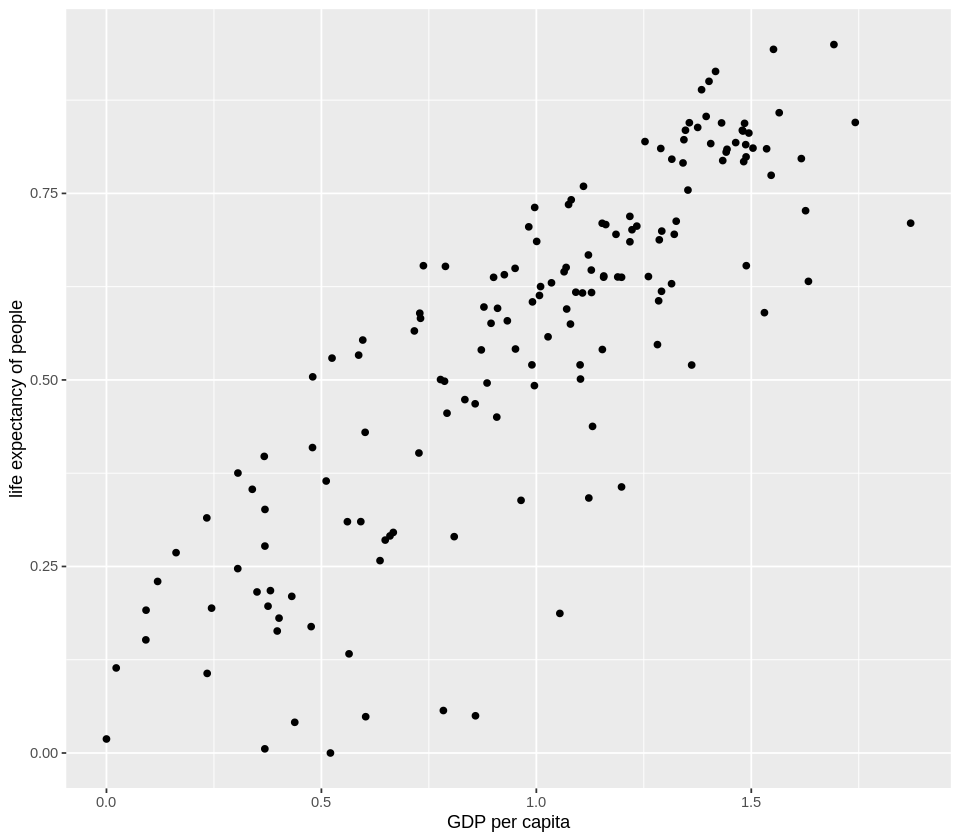

In [43]:
options(repr.plot.width = 8, repr.plot.height = 7)

header_plot <- ggplot(happy_header, aes(x = GDP_per_capita, y = life_expectancy)) + geom_point() + xlab("GDP per capita") + ylab("life expectancy of people")
header_plot

In [44]:
test_3.9()

[1] "Success!"


## 4. Reading Data from a Database

### Investigating the reliability of flights into and out of Boston Logan International Airport

Delays and cancellations seem to be an unavoidable risk of air travel. A missed connection, or hours spent waiting at the departure gate, might make you wonder though: how reliable is air travel, *really*?

The US Bureau of Transportation Statistics keeps a continually-updated [Airline On-Time Performance Dataset](https://transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&DB_Name=Airline%20On-Time%20Performance%20Data) that has tracked the scheduled and actual departure / arrival time of flights in the United States from 1987 to the present day. In this section we'll do some exploration of this data to try to answer some of the above questions. The actual data we'll be using was from only the year 2015, and was compiled into the [2015 Kaggle Flight Delays Dataset](https://www.kaggle.com/usdot/flight-delays) from the raw Bureau data. But even that  dataset is too large to handle in this course (5.8 million flights in just one year!), so the data have been filtered down to flights that either depart or arrive at Logan International Airport (`BOS`), resulting in around 209,000 flight records. 

Our data has the following variables (columns):

- year
- month
- day
- day of the week (from 1 - 7.999..., with fractional days based on departure time)
- origin airport code
- destination airport code
- flight distance (miles)
- scheduled departure time (local)
- departure delay (minutes)
- scheduled arrival time (local)
- arrival delay (minutes)
- diverted? (True/False)
- cancelled? (True/False)




**Question 4.1** True or False:
<br> {points: 1}

We can use our dataset to figure out which airline company was the least likely to experience a flight delay in 2015.

*Assign your answer to an object called `answer4.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [45]:
# Replace the fail() with your answer. 

answer4.1 <- "false"

In [46]:
test_4.1()

[1] "Success!"


**Question 4.2** Multiple Choice
<br> {points: 1}

If we're mostly concerned with getting to our destination on time, which variable in our dataset should we use as the y-axis of a plot?

A. flight distance

B. departure delay

C. origin airport code

D. arrival delay

*Assign your answer as a single character to an object called `answer4.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [47]:
# Replace the fail() with your answer. 

answer4.2 <- "D"

In [48]:
test_4.2()

[1] "Success!"


Let's start exploring our data. The file is stored in `data/flights_filtered.db` in your working directory (still the `worksheet_02` folder). If you try to open the file in Jupyter to inspect its contents, you'll again run into the `File Load Error ... is not UTF-8 encoded` message you got earlier when trying to open an Excel spreadsheet in Jupyter. This is because the file is a *database* (often denoted by the `.db` extension), which are usually not stored in plain text. 

We'll need more R packages to help us handle this kind of data: 

- the [database interface (`DBI`) package](https://www.rdocumentation.org/packages/DBI/versions/0.5-1) for opening, connecting to, and interfacing with databases
- the [R SQLite (`RSQLite`) package](https://cran.r-project.org/web/packages/RSQLite/vignettes/RSQLite.html) so that DBI can talk to SQLite databases 
  - there are many kinds of databases; the `flights_filtered.db` database is an SQLite database
- the [dbplyr package](https://cran.r-project.org/web/packages/dbplyr/vignettes/dbplyr.html) for manipulating tables in the database using functions in R
  - without this, in order to retrieve data from the database, we would have to know a whole separate language, Structured Query Language (SQL)

Let's load those now.



In [49]:
# Run this cell before continuing.
library(DBI)
library(RSQLite)
library(dbplyr)


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql




In order to open a database in R, you need to take the following steps:

1. Connect to the database using the `dbConnect` function.
2. Check what tables (similar to R dataframes, Excel spreadsheets) are in the database using the `dbListTables` function
3. Once you've picked a table, create an R object for it using the `tbl` function

*Note: the `tbl` function returns a **reference** to a database table, not the actual data itself. This allows R to talk to the database / get subsets of data without loading the entire thing into R!*

The next few questions will walk you through this process.


**Question 4.3.1** 
<br> {points: 1}

Use the `dbConnect` function to open and connect to the `flights_filtered.db` database in the `data` folder.

*Note: we have provided the first argument, `RSQLite::SQLite()`, to `dbConnect` for you below. This just tells the dbConnect function that we will be using an SQLite database.*

*Assign the output to a variable named `conn`*.

In [50]:
#... <- dbConnect(RSQLite::SQLite(), '...')  #replace ... with the database relative path

conn <- dbConnect(RSQLite::SQLite(), 'data/flights_filtered.db')
conn

<SQLiteConnection>
  Path: /home/jupyter/dsci-100-student/materials/worksheet_reading/data/flights_filtered.db
  Extensions: TRUE

In [51]:
test_4.3.1()

[1] "Success!"


**Question 4.3.2**
<br> {points: 1}

Use the `dbListTables` function to inspect the database to see what tables it contains.

*Make a new variable named `flights_table_name` that stores the name of the table with our data in it*

In [142]:
# Use this cell to figure out how to answer the question
# Call the dbListTables function in this cell and take a look at the output
# If you don't know what argument to give dbListTables, use ?dbListTables to find out!

#dbListTables(...) #replace ... with the right argument

dbListTables(conn)

#once you've called this and seen the output, insert the output string in the cell below as denoted

[1] "bos_flights"

In [144]:
#... <- '...'

flights_table_name <- dbListTables(conn)

In [145]:
test_4.3.2()

[1] "Success!"


**Question 4.3.3**
<br> {points: 1}

Use the `tbl` function to create an R reference to the table so that you can manipulate it with `dbplyr` functions.

*Make a new variable named `flight_data` based on the output of `tbl`*

In [146]:
#flight_data <- ...

flight_data <- tbl(conn, flights_table_name)

In [147]:
test_4.3.3()

[1] "Success!"


Now that we've connected to the database and created an R table object, we'll take a look at the first few rows and columns of the flight on-time performance data. Even though `flight_data` isn't a regular R dataframe---it's a database table connection, or specifically a `tbl_SQLiteConnection`---the functions from the `dbplyr` package let us treat it like an R dataframe!
 
So let's try using the `head` function (which allows us to see the first few rows of a dataset) and see what happens:

In [148]:
# Run this cell before continuing.
head(flight_data)

# Source:   lazy query [?? x 13]
# Database: sqlite 3.30.1
#   [/home/jupyter/dsci-100-student/materials/worksheet_reading/data/flights_filtered.db]
   YEAR MONTH   DAY DAY_OF_WEEK ORIGIN_AIRPORT DESTINATION_AIR… DISTANCE
  <int> <int> <int>       <int> <chr>          <chr>               <int>
1  2015     1     1           4 SJU            BOS                  1674
2  2015     1     1           4 BOS            MYR                   738
3  2015     1     1           4 BOS            MIA                  1258
4  2015     1     1           4 BOS            BWI                   369
5  2015     1     1           4 ORD            BOS                   867
6  2015     1     1           4 BOS            DTW                   632
# … with 6 more variables: SCHEDULED_DEPARTURE <int>, DEPARTURE_DELAY <dbl>,
#   SCHEDULED_ARRIVAL <int>, ARRIVAL_DELAY <dbl>, DIVERTED <int>,
#   CANCELLED <int>

It works! And---as luck would have it---it also works to use the `select` and `filter` functions you've learned about previously.

*Note: not all functions that you're familiar with work on database table `tbl` reference objects. For example, if you try to run `nrow` (to count the rows) or `tail` (to get the last rows of the table), you won't get the result you expect*.


**Question 4.4**
<br> {points: 1}

Use the `select` and `filter` functions to extract the **arrival and departure delay** columns for rows where **the origin airport is BOS.**

*Store your answer in a variable called* `delay_data`.

In [149]:
filtered <- filter(flight_data, ORIGIN_AIRPORT == "BOS")
delay_data <- select(filtered, DEPARTURE_DELAY, ARRIVAL_DELAY)
delay_data

# Source:   lazy query [?? x 2]
# Database: sqlite 3.30.1
#   [/home/jupyter/dsci-100-student/materials/worksheet_reading/data/flights_filtered.db]
   DEPARTURE_DELAY ARRIVAL_DELAY
             <dbl>         <dbl>
 1              -4           -10
 2              -5             2
 3              -4           -21
 4              -3           -21
 5               6            -9
 6              -2           -13
 7              -9            -6
 8               2           -19
 9              -4           -10
10              -4           -26
# … with more rows

In [150]:
test_4.4()

[1] "Success!"


In [151]:
# Take a look at `delay_data` to make sure it has the two columns we expect.
# Run this cell before continuing.
head(delay_data)

# Source:   lazy query [?? x 2]
# Database: sqlite 3.30.1
#   [/home/jupyter/dsci-100-student/materials/worksheet_reading/data/flights_filtered.db]
  DEPARTURE_DELAY ARRIVAL_DELAY
            <dbl>         <dbl>
1              -4           -10
2              -5             2
3              -4           -21
4              -3           -21
5               6            -9
6              -2           -13

You'll notice in the `Source:` line that the dimension of the table is listed as `[?? x 2]`. This is because databases do things in the *laziest* way possible. Since we only asked the database for its `head` (the first few rows), it didn't bother going through all the rows to figure out how many there are. This sort of laziness can help make things run a lot faster when dealing with large datasets.

Our next task is to visualize our data to see whether there is a difference in delays for arrivals at and departures from `BOS`. But before we do that, let's figure out just how much data we're working with using the `count` function.

In [152]:
# Run this cell before continuing.
count(delay_data)

# Source:   lazy query [?? x 1]
# Database: sqlite 3.30.1
#   [/home/jupyter/dsci-100-student/materials/worksheet_reading/data/flights_filtered.db]
       n
   <int>
1 104804

Yikes---that's a lot of data! If we tried to do a scatter plot of these, we probably wouldn't be able to see anything useful; all the points would be mushed together. Let's try using a *histogram* instead. A histogram helps us visualize how a particular variable is distributed in a dataset. It does this by separating the data into *bins*, and then plotting vertical bars showing how many data points fell in each bin.

For example, we could use a histogram to visualize the distribution of waiting times between eruptions of the Old Faithful geyser in Yellowstone National Park, Wyoming with the `geom_histogram` layer. The `bins` argument specifies the number of bins to use in the histogram.


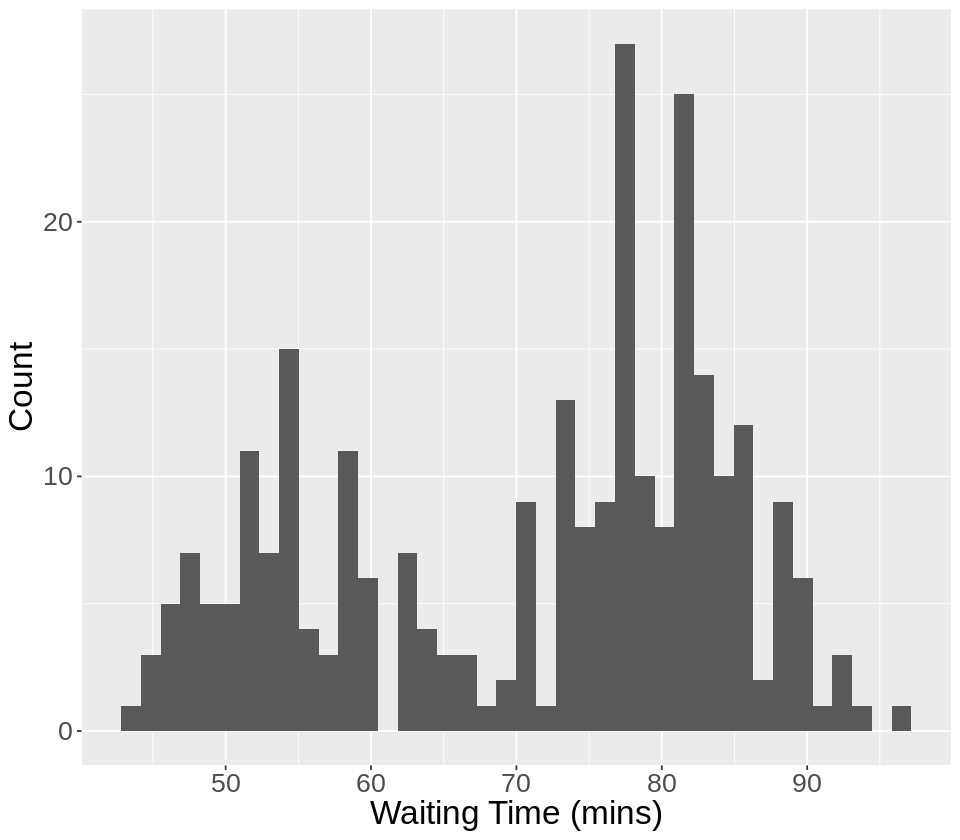

In [153]:
# Run this cell before continuing.
ggplot(faithful, aes(x = waiting)) + 
    geom_histogram(bins = 40) + 
    xlab("Waiting Time (mins)") + 
    ylab("Count") + 
    theme(text = element_text(size=20))

We'll use histograms to visualize the departure delay times and arrival delay times separately.

**Question 4.5**
<br> {points: 1}

Plot the **arrival** delay time data as a histogram. You will plot the delay (in hours) separated into 15-minute-wide bins on the x axis. The y axis will show the percentage of flights departing BOS that had that amount of delay during 2015.

You'll do this by finishing the code segment provided below. There are 4 places where `...` appears in the provided code below. Replace each instance of `...` with the correct item from the following list:

- `ARRIVAL_DELAY/60`
- `'steelblue'`
- `"Delay (hours)"`
- `geom_histogram`

*Assign the output of ggplot to an object called* `arrival_delay_plot`.

Warning message:
“Removed 203 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


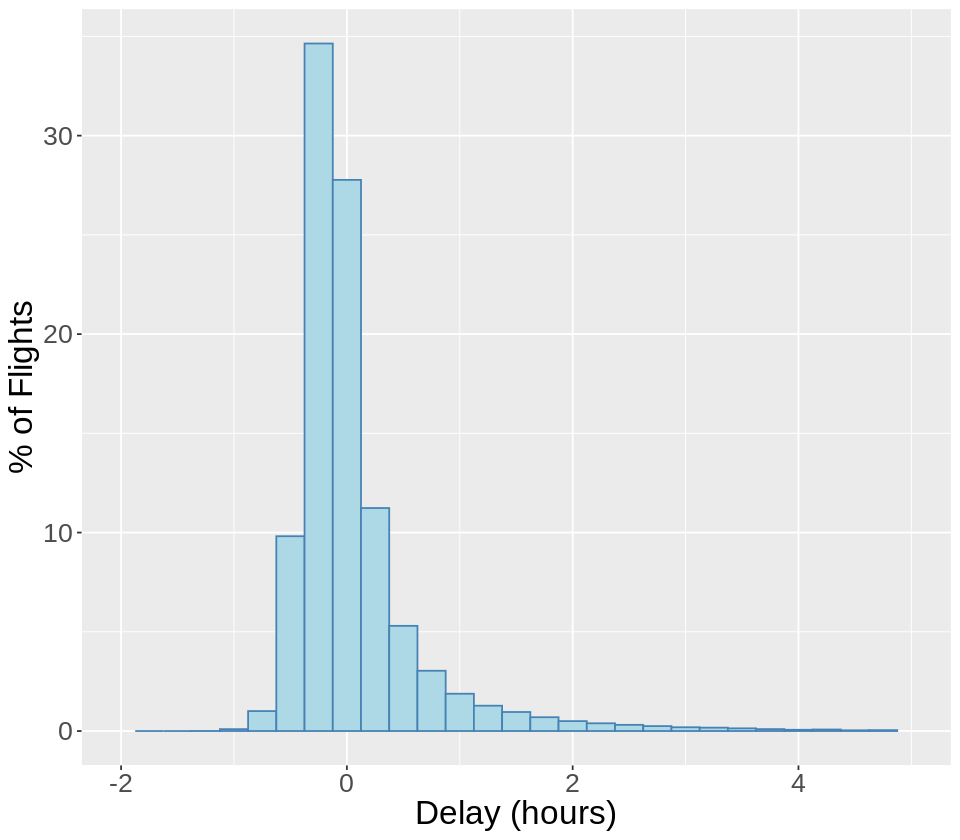

In [154]:
# Replace each ... with the correct item in the list above. 

# ... <- ggplot(delay_data, aes(x = ...)) +
#    ...(aes(y = 100 * stat(count) / sum(stat(count))),
#        binwidth = .25,
#        fill = "lightblue",
#        color = ...) +
#    scale_x_continuous(limits = c(-2, 5)) +
#    ylab("% of Flights") +
#    xlab(...) +
#    theme(text = element_text(size=20))
# ...

arrival_delay_plot <- ggplot(delay_data, aes(x = ARRIVAL_DELAY/60)) +
    geom_histogram(aes(y = 100 * stat(count) / sum(stat(count))),
        binwidth = .25,
        fill = "lightblue",
        color = 'steelblue') +
    scale_x_continuous(limits = c(-2, 5)) +
    ylab("% of Flights") +
    xlab("Delay (hours)") +
    theme(text = element_text(size=20))

arrival_delay_plot

In [64]:
test_4.5()

[1] "Success!"


**Question 4.6**
<br> {points: 1}

Plot the **departure** delay time data as a histogram with the same format as the previous plot. **Hint:** copy and paste your code from the previous block! The only thing that will change is column from `delay_data` that you use for the x-axis.

*Assign the output of ggplot to an object called* `departure_delay_plot`.

Warning message:
“Removed 201 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


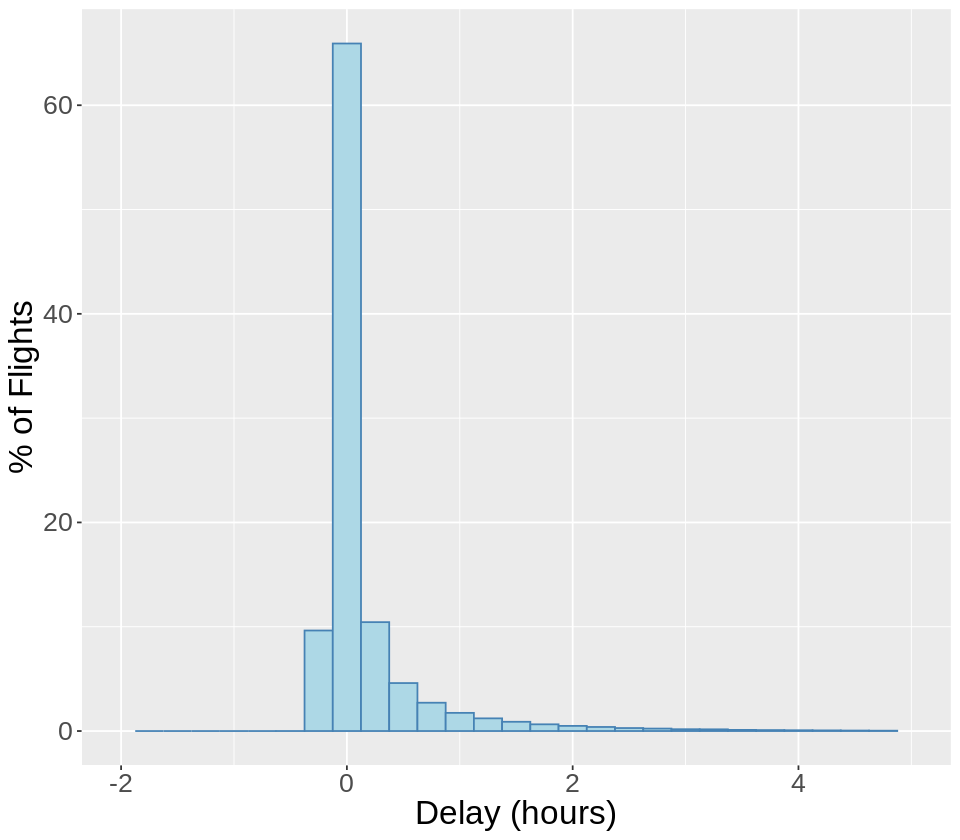

In [65]:
departure_delay_plot <- ggplot(delay_data, aes(x = DEPARTURE_DELAY / 60)) +
                          geom_histogram(aes(y = 100 * stat(count) / sum(stat(count))),
                                           binwidth = 0.25, fill = 'lightblue', color = 'steelblue') +
                          scale_x_continuous(limits = c(-2, 5)) +
                          ylab("% of Flights") +
                          xlab("Delay (hours)") +
                          theme(text = element_text(size=20))
departure_delay_plot

In [66]:
test_4.6()

[1] "Success!"


**Question 4.7**
<br> {points: 1}

Look at the two plots you generated. Are departures from or arrivals to `BOS` more likely to be on time (at most 15 minutes ahead/behind schedule)?

_Assign your answer (either `"departures"` or `"arrivals"`) to an object called `answer4.7`._

In [67]:
answer4.7 <- "departures"

In [68]:
test_4.7()

[1] "Success!"


So far, we've done everything using the `delay_data` database reference object constructed using functions from the `dbplyr` library. Remember: this isn't the data itself! If we want to save the small data subset that we've constructed to our local machines (perhaps to share it on the web or with collaborators), we'll need to take one last step. 

**Question 4.8.1**
<br>{points: 1}

We want to download the arrival / departure times data where the origin airport is BOS from the database. We will use the `collect` function to do this, which of the following should you use? 

A. `collect(delay_data)`

B. `collect(flights_table_name)`

C. `collect(conn)`

D. `collect(flight_data)`

*Assign your answer to an object called `answer4.8.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [69]:
# Replace the fail() with your answer. 

answer4.8.1 <- "A"

In [70]:
test_4.8.1()

[1] "Success!"


**Question 4.8.2**
<br>{points: 1}

**If you input the wrong argument in the `collect()` function below your worksheet will time out. Please double check you have the correct answer to question 4.8.1 above and input the correct argument in the `collect()` function below!** 

Use the `collect` function to download the arrival / departure times data where the origin airport is BOS from the database and store it in a dataframe object called `delay_dataframe`. Then, use the `write_csv` function to write the dataframe to a file called `delay_data.csv`. Save the file in the `data/` folder.

*Note: there are many possible ways to use `write_csv` to customize the output. Just use the defaults here!*

In [71]:
#If you don't know how to call collect or write_csv, use this cell to 
#check the documentation by calling ?collect or ?write_csv

?write_csv

write_delim {readr},R Documentation
x,A data frame to write to disk
path,Path or connection to write to.
delim,"Delimiter used to separate values. Defaults to "" "" for write_delim(), "","" for write_excel_csv() and "";"" for write_excel_csv2(). Must be a single character."
na,String used for missing values. Defaults to NA. Missing values will never be quoted; strings with the same value as na will always be quoted.
append,"If FALSE, will overwrite existing file. If TRUE, will append to existing file. In both cases, if file does not exist a new file is created."
col_names,Write columns names at the top of the file? Must be either TRUE or FALSE.
quote_escape,"The type of escaping to use for quoted values, one of ""double"", ""backslash"" or ""none"". You can also use FALSE, which is equivalent to ""none"". The default is to double the quotes, which is the format excel expects."


In [72]:
# If you input the wrong tbl in the collect() function below your worksheet will time out
# Please make sure you check your answer to question 4.8.1 and input the correct tbl in the collect() function below 
#delay_dataframe <- collect(...)
#write_csv(..., ...)

delay_dataframe <- collect(delay_data)
write_csv(delay_dataframe, "data/delay_data.csv")

In [73]:
test_4.8.2()

[1] "Success!"


In [74]:
source("cleanup.R")

## 5 (Optional). Reading Data from the Internet

### How has the World Gross Domestic product changed throughout history?


As defined on Wikipedia, the "Gross world product (GWP) is the combined gross national product of all the countries in the world." Living in our modern age with our roaring (sometimes up and sometimes down) economies, one might wonder how the world economy has changed over history. To answer this question we will scrape data from the [Wikipedia Gross world product page](https://en.wikipedia.org/wiki/Gross_world_product).

Your data set will include the following columns: 
* `year`
* `gwp_value`

Specifically we will scrape the 2 columns named "Year" and "Real GWP" in the table under the header "Historical and prehistorical estimates". **The end goal of this exercise is to create a line plot with year on the x-axis and GWP value on the y-axis.**

**Question 5.1.0** Multiple Choice: 
<br> {points: 0}

Under which of the following headers in the table will we scrape from on the [Wikipedia Gross world product page](https://en.wikipedia.org/wiki/Gross_world_product)?

A. Gross world product

B. Recent growth

C. Historical and prehistorical estimates

D. See also

*Assign your answer to an object called `answer5.1.0`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_5.1.0()

**Question 5.1.1** Multiple Choice: 
<br> {points: 0}

What is going to be the x-axis of the scatter plot we create?

A. compound annual growth rate

B. the value of the gross world product

C. year

*Assign your answer to an object called `answer5.1.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).* 

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_5.1.1()

We need to now load the `rvest` package to begin our web scraping!

In [ ]:
# Run this cell 
library(rvest)

**Question 5.2**
<br> {points: 0}

Use `read_html` to download information from the URL given in the cell below. Instead of copying the entire URL, you can simply use the object (`url`) after `read_html()`.

*Assign your answer to an object called `gwp`.*

In [ ]:
url <- 'https://en.wikipedia.org/wiki/Gross_world_product'

# your code here
fail() # No Answer - remove if you provide an answer
print(gwp)

In [ ]:
test_5.2()

**Question 5.3**

Run the cell below to create the first column of your data set (the year from the table under the "Historical and prehistorical estimates" header). The node was obtained using `SelectorGadget`. 

In [ ]:
# Run this cell to create the first column for your data set. 
year <- html_text(html_nodes(gwp, ".wikitable tbody:nth-child(1) td:nth-child(1)"))
head(year)

We can see that although we want numbers for the year, the data we scraped includes the characters `AD` and `\n` (a newline character). We will have to do some string manipulation and then convert the years from characters to numbers. 

First we use the `str_replace_all` function to match the string `" AD\n"` and replace it with nothing `""`:

In [ ]:
# Run this cell.
# Use stringr library.
library(stringr)
# Replace " AD\n" with nothing.
year <- str_replace_all(string = year, pattern = " AD\n", replacement = "")
print(year)

When we print year, we can see we were able to remove `" AD\n"`, but we missed that there is also `" BC\n"` on the earliest years! There are also commas (`","`) in the large BC years that we will have to remove. We also need to put a `-` sign in front of the BC numbers so we don't confuse them with the AD numbers after we convert everything to numbers. To do this we will need to use a similar strategy to clean this all up! 

This week we will provide you the code to do this cleaning, next week you will learn to do these kinds of things yourself. After we do all the string/text manipulation then we use the `as.numeric` function to convert the text to numbers.

In [ ]:
# Run this cell to clean up the year data and convert it to a number.
# Use grep to select the lines containing " BC\n" and put a - at the beginning of them.
year[grepl(pattern = " BC\n", x = year)] <- str_replace_all(string = year[grepl(pattern = " BC\n", x = year)], pattern = "^", replacement = "-")

# Replace all commas with nothing.
year <- str_replace_all(string = year, pattern = ",", replacement = "")
# Extract the minus symbol and the numbers.
year <- as.numeric(str_extract(string = year, pattern = "-?[0-9]+"))
print(year)

**Question 5.4**
<br> {points: 0}

Create a new column for the gross world product (GWP) from the table we are scraping. Don't forget to use `SelectorGadget` to obtain the CSS selector needed to scrape the GWP values from the table we are scraping. Assign your answer to an object called `gwp_value`. 

Fill in the `...` in the cell below. Copy and paste your finished answer into the `fail()`. 

Refer to **Question 5.3** and don't be afraid to ask for help. 

In [ ]:
#... <- ...(html_nodes(gwp, ...))

# your code here
fail() # No Answer - remove if you provide an answer
head(gwp_value)

In [ ]:
test_5.4()

Again, looking at the output of `head(gwp_value)` we see we have some cleaning and type conversions to do. We need to remove the commas, the extraneous trailing information in the first 3 columns, and the `"\n"` character again. We provide the code to do this below:

In [ ]:
# Run this cell to clean up the year data and convert it to a number.

# Replace all commas with nothing.
gwp_value <- str_replace_all(string = gwp_value, pattern = ",", replacement = "")

# Extract the numbers and decimals.
gwp_value <- as.numeric(str_extract(string = gwp_value, pattern = "[0-9.]+")) 
head(gwp_value)

**Question 5.5**
<br> {points: 0}

Use the `tidyverse` `tibble` function to create a data frame named `gwp` with `year` and `gwp_value` as columns. The general form for the creating data frames from vectors/lists using the `tibble` function is as follows:

```tibble(COLUMN1_NAME, COLUMN2_NAME, COLUMN3_NAME, ...)```

In [ ]:
#... <- tibble(..., ...)

# your code here
fail() # No Answer - remove if you provide an answer
gwp

In [ ]:
test_5.5()

One last piece of data transformation/wrangling we will do before we get to data visualization is to create another column called `sqrt_year` which scales the year values so that they will be more informative when we plot them (if you look at our year data we have a lot of years in the recent past, and fewer and fewer as we go back in time). Often times you can just transform the scale within `ggplot` (for example see what we do with the `gwp_value` later on), but the year value is tricky for scaling because it contains negative values. So we need to first make everything positive, then take the square root, and then re-transform the values that should be negative to negative again! We provide the code to do this below.

In [ ]:
gwp <- mutate(gwp, sqrt_year = sqrt(abs(year)))
gwp <- mutate(gwp, sqrt_year = if_else(year < 0, sqrt_year * -1, sqrt_year))
gwp

**Question 5.6**
<br> {points: 0}

Create a line plot using the `gwp` data frame where `sqrt_year` is on the x-axis and `gwp_value` is on the y-axis. *We provide the plot code to relabel the x-axis with the human understandable years instead of the tranformed ones we plot.* Name your plot object `gwp_historical`. To make a line plot instead of a scatter plot you should use the `geom_line()` function instead of the `geom_point()` function.

In [ ]:
#... <- ggplot(gwp, aes(x = ..., y = ...)) +
    #geom_line() +
    #scale_y_continuous(trans='log10') +
    #scale_x_continuous(breaks = c(-1000, -750, -500, -250, -77.7, 0, 38.7), 
    #                   labels = c("-1000000", "-562500", "-250000", "-62500", "-5000", "0", "1500")) +
    #ylab("...") +
    #xlab("Year") +
    #theme(text = element_text(size=20))


options(repr.plot.width=15, repr.plot.height=7)
# your code here
fail() # No Answer - remove if you provide an answer
gwp_historical

In [ ]:
test_5.6()

**Question 5.7** 
<br> {points: 0}

Looking at the line plot, when does the Gross World Domestic Product first start to more rapidly increase (i.e., when does the slope of the line first change)? 

A. roughly around year -1,000,000

B. roughly around year -250,000

C. roughly around year -5000

D. roughly around year 1500


*Assign your answer to an object called `answer5.7`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [ ]:
# Replace the fail() with your answer. 

# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
test_5.7()

In [ ]:
source("cleanup.R")